In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df = pd.read_excel('C:/.../PSP_Jan_Feb_2019.xlsx')

In [3]:
#Information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 non-null  int64         
 4   success     50410 non-null  int64         
 5   PSP         50410 non-null  object        
 6   3D_secured  50410 non-null  int64         
 7   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.1+ MB


In [4]:
#First five rows and all columns
df.head()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [5]:
#Chechking NA values
df.isna().sum()

Unnamed: 0    0
tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

In [6]:
df['amount'].describe()

count    50410.000000
mean       202.395715
std         96.274730
min          6.000000
25%        133.000000
50%        201.000000
75%        269.000000
max        630.000000
Name: amount, dtype: float64

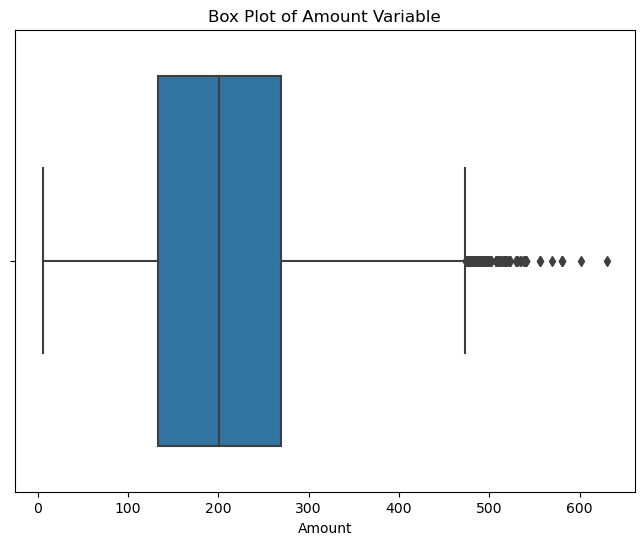

In [9]:
#Box-plot for amount
plt.figure(figsize=[8, 6])
sns.boxplot(x=df['amount'])
plt.title('Box Plot of Amount Variable')
plt.xlabel('Amount')
plt.show()

In [10]:
#Outlier Imputation
percentile25 = df['amount'].quantile(0.25)
percentile75 = df['amount'].quantile(0.75)

from scipy.stats import iqr
upper_limit = percentile75 + 1.5 * iqr(df['amount'])
lower_limit = percentile25 - 1.5 * iqr(df['amount'])
df[df['amount'] > upper_limit]
df[df['amount'] < lower_limit]
new_df = df[df['amount'] < upper_limit]
new_df.shape
new_df.to_csv('new_df.csv', index=False)